In [32]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
dfNFL = pd.read_csv('data/nfl_elo.csv')

In [3]:
dfNFL.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2
0,1920-09-26,1920,0,NaN,RII,STP,1503.947,1300.000,0.824651,0.175349,1516.108,1287.838,48,0
1,1920-10-03,1920,0,NaN,BFF,WBU,1478.004,1300.000,0.802000,0.198000,1489.757,1288.247,32,6
2,1920-10-03,1920,0,NaN,CBD,PTQ,1504.688,1300.000,0.825267,0.174733,1516.803,1287.885,48,0
3,1920-10-03,1920,0,NaN,CHI,MUT,1368.333,1300.000,0.682986,0.317014,1386.533,1281.800,20,0
4,1920-10-03,1920,0,NaN,RII,MUN,1516.108,1478.004,0.644171,0.355829,1542.135,1451.977,45,0


In [11]:
def find_elo_victs(df, season):
    elo = dict()
    victories = defaultdict(lambda: defaultdict(int))
    dfSeason = df.loc[df['season'] == season]
    for _, row in dfSeason.iterrows():
        elo[row['team1']] = row['elo1_post']
        elo[row['team2']] = row['elo2_post']
        if row['score1'] > row['score2']:
            victories[row['team1']][row['team2']] += 1
        else:
            victories[row['team2']][row['team1']] += 1
    return elo, victories

In [12]:
elo, victories = find_elo_victs(dfNFL, 2018)

In [13]:
print(elo)

{'PHI': 1619.7703388785, 'ATL': 1527.97373691553, 'BAL': 1603.30887336888, 'BUF': 1420.13552226018, 'IND': 1589.1118479495099, 'CIN': 1390.3002727149499, 'CLE': 1431.32960206708, 'PIT': 1605.78982950909, 'NE': 1708.7847321643699, 'HOU': 1520.58279645841, 'MIA': 1370.2681428058802, 'TEN': 1525.8608052937, 'NYG': 1411.5883036424, 'JAX': 1430.3736091278, 'NO': 1663.90490475508, 'TB': 1414.6590028868802, 'MIN': 1555.1359313899302, 'SF': 1381.44773691811, 'LAC': 1626.1278770087197, 'KC': 1650.61614068496, 'CAR': 1526.5681586114401, 'DAL': 1567.4564081076098, 'ARI': 1323.11063335304, 'WSH': 1409.03268764508, 'DEN': 1421.2462918800197, 'SEA': 1595.6174728903602, 'GB': 1430.1970549029902, 'CHI': 1630.8468971726402, 'DET': 1483.27911390454, 'NYJ': 1324.94966353912, 'OAK': 1355.66092668292, 'LAR': 1644.52349932507}


In [43]:
def find_diff_win_rates(elo, victories):
    teams = list(elo.keys())
    higher_wins = defaultdict(int)
    higher_loses = defaultdict(int)
    for t1 in teams:
        for t2 in teams:
            if t1 == t2:
                continue
            diff_unrounded = np.abs(elo[t1] - elo[t2])
            diff = np.around(diff_unrounded/5, decimals=0)*5
            if victories[t1][t2]:
                w = t1
                l = t2
            else:
                w = t2
                l = t1
            if elo[w] > elo[l]:
                higher_wins[diff] += 1
            else:
                higher_loses[diff] += 1
    
    win_rates = {}
    for diff in higher_wins.keys():
        win_rates[diff] = higher_wins[diff]/(higher_wins[diff]+higher_loses[diff])
    
    return win_rates

In [44]:
win_rates = find_diff_win_rates(elo, victories)

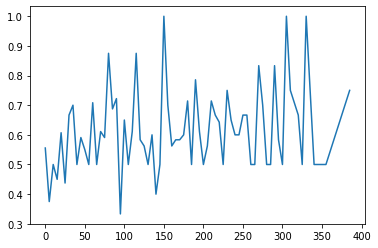

In [45]:
lists = sorted(win_rates.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [46]:
for k in sorted(win_rates.keys()):
    print(k, win_rates[k])

0.0 0.5555555555555556
5.0 0.375
10.0 0.5
15.0 0.45
20.0 0.6071428571428571
25.0 0.4375
30.0 0.6666666666666666
35.0 0.7
40.0 0.5
45.0 0.5909090909090909
50.0 0.55
55.0 0.5
60.0 0.7083333333333334
65.0 0.5
70.0 0.6111111111111112
75.0 0.5909090909090909
80.0 0.875
85.0 0.6875
90.0 0.7222222222222222
95.0 0.3333333333333333
100.0 0.65
105.0 0.5
110.0 0.6111111111111112
115.0 0.875
120.0 0.5833333333333334
125.0 0.5625
130.0 0.5
135.0 0.6
140.0 0.4
145.0 0.5
150.0 1.0
155.0 0.7
160.0 0.5625
165.0 0.5833333333333334
170.0 0.5833333333333334
175.0 0.6
180.0 0.7142857142857143
185.0 0.5
190.0 0.7857142857142857
195.0 0.6111111111111112
200.0 0.5
205.0 0.5625
210.0 0.7142857142857143
215.0 0.6666666666666666
220.0 0.6428571428571429
225.0 0.5
230.0 0.75
235.0 0.65
240.0 0.6
245.0 0.6
250.0 0.6666666666666666
255.0 0.6666666666666666
260.0 0.5
265.0 0.5
270.0 0.8333333333333334
275.0 0.7
280.0 0.5
285.0 0.5
290.0 0.8333333333333334
295.0 0.5833333333333334
300.0 0.5
305.0 1.0
310.0 0.75
320.0